In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [254]:
raw_data= pd.read_csv(r'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

In [255]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [256]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [257]:
raw_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [258]:
raw_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [259]:
raw_data=raw_data[raw_data['ocean_proximity']!= 'ISLAND']

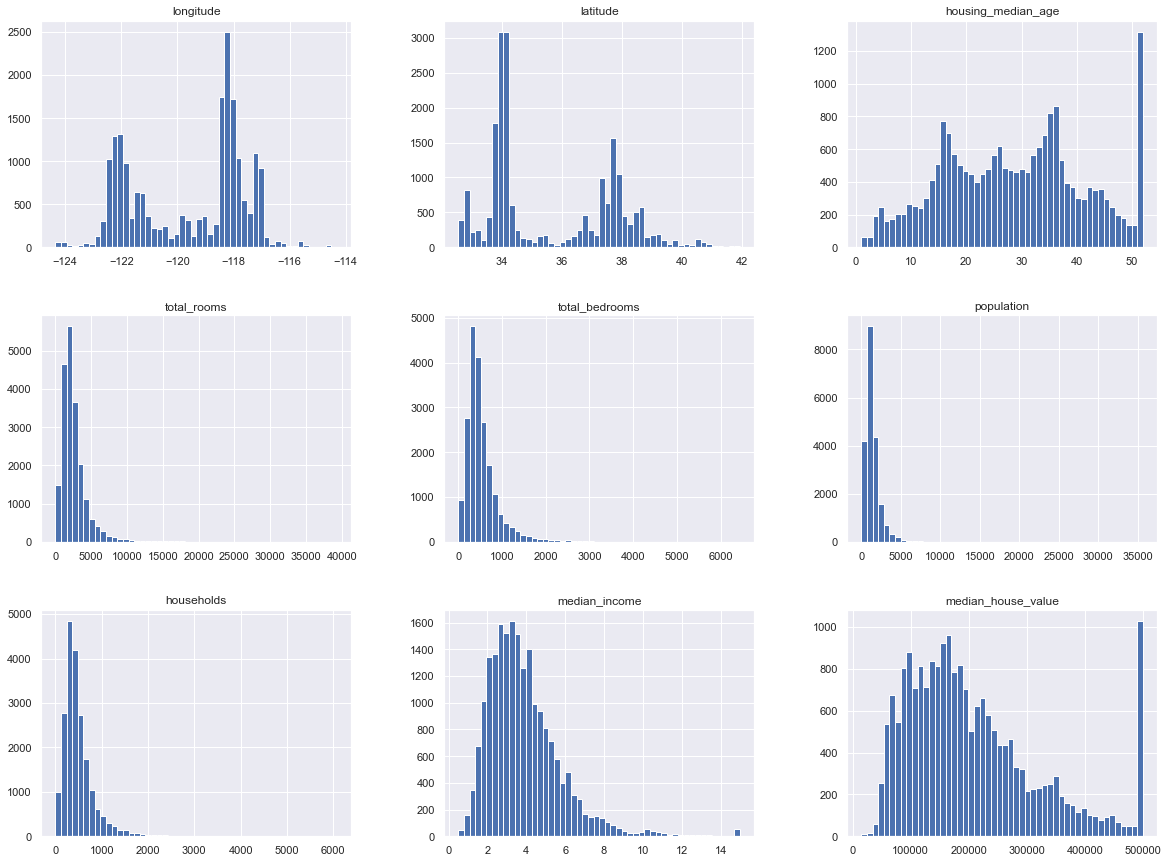

In [260]:
raw_data.hist(bins=50, figsize=(20,15))
plt.show()

In [261]:
q1= raw_data['total_rooms'].quantile(0.99)
q2= raw_data['total_bedrooms'].quantile(0.99)
q3= raw_data['population'].quantile(0.99)
q4= raw_data['households'].quantile(0.99)

In [262]:
raw_data= raw_data[raw_data['total_rooms']<q1]
raw_data= raw_data[raw_data['total_bedrooms']<q2]
raw_data= raw_data[raw_data['population']<q3]
raw_data= raw_data[raw_data['households']<q4]

In [263]:
raw_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [264]:
raw_data.corr()['median_house_value'].sort_values()

latitude             -0.144842
longitude            -0.045337
population           -0.041086
total_bedrooms        0.054569
households            0.073164
housing_median_age    0.109994
total_rooms           0.165200
median_income         0.688769
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [265]:
from sklearn.utils import shuffle
shuffled_data = shuffle(raw_data, random_state=42)

In [266]:
from sklearn.model_selection import train_test_split
train_and_validation_set, test_set = train_test_split(shuffled_data, test_size=0.2, random_state=42)

In [267]:
from sklearn.model_selection import train_test_split
train_set, validation_set = train_test_split(train_and_validation_set, test_size=0.1, random_state=42)

In [268]:
x_train= train_set.drop('median_house_value', axis= 1)
y_train= train_set['median_house_value']

x_val= validation_set.drop('median_house_value', axis= 1)
y_val= validation_set['median_house_value']

x_test= test_set.drop('median_house_value', axis= 1)
y_test= test_set['median_house_value']

In [269]:
num_columns = x_train.loc[:, x_train.dtypes != object].columns.tolist()
cat_columns = x_train.loc[:, x_train.dtypes == object].columns.tolist()

In [270]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
 ('std_scaler', StandardScaler())
 ])

cat_pipeline = Pipeline([
    ('cat_1hot', OneHotEncoder())
])

In [271]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
                                        ('num_pipeline', num_pipeline, num_columns),
                                        ('cat_pipeline', cat_pipeline, cat_columns)
                                        ])

x_train_prepared = column_transformer.fit_transform(x_train)

In [272]:
num_columns = x_val.loc[:, x_val.dtypes != object].columns.tolist()
cat_columns = x_val.loc[:, x_val.dtypes == object].columns.tolist()
x_val_prepared = column_transformer.fit_transform(x_val)

In [273]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=50, verbose=2)
forest_reg.fit(x_train_prepared, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.9s finished


RandomForestRegressor(n_estimators=50, verbose=2)

In [274]:
forest_reg.score(x_train_prepared, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


0.9730981338605496

In [275]:
forest_reg.score(x_val_prepared, y_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


0.7281342773278188

In [276]:
train_predictions= forest_reg.predict(x_train_prepared)
val_predictions= forest_reg.predict(x_val_prepared)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [277]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'min_samples_leaf': [2, 3, 4]}
    ]
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=2)
grid_search.fit(x_train_prepared, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .max_features=2, min_samples_leaf=2, n_estimators=3; total time=   0.0s
[CV] END .max_features=2, min_samples_leaf=2, n_estimators=3; total time=   0.0s
[CV] END .max_features=2, min_samples_leaf=2, n_estimators=3; total time=   0.0s
[CV] END .max_features=2, min_samples_leaf=2, n_estimators=3; total time=   0.0s
[CV] END .max_features=2, min_samples_leaf=2, n_estimators=3; total time=   0.0s
[CV] END max_features=2, min_samples_leaf=2, n_estimators=10; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=2, n_estimators=10; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=2, n_estimators=10; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=2, n_estimators=10; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=2, n_estimators=10; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=2, n_estimators=30; total time=   0.8s
[CV] END max_features=2, min_samples_leaf=2, n_

[CV] END max_features=6, min_samples_leaf=2, n_estimators=30; total time=   2.0s
[CV] END max_features=6, min_samples_leaf=2, n_estimators=30; total time=   1.9s
[CV] END max_features=6, min_samples_leaf=2, n_estimators=30; total time=   2.0s
[CV] END max_features=6, min_samples_leaf=2, n_estimators=30; total time=   1.9s
[CV] END .max_features=6, min_samples_leaf=3, n_estimators=3; total time=   0.1s
[CV] END .max_features=6, min_samples_leaf=3, n_estimators=3; total time=   0.1s
[CV] END .max_features=6, min_samples_leaf=3, n_estimators=3; total time=   0.1s
[CV] END .max_features=6, min_samples_leaf=3, n_estimators=3; total time=   0.1s
[CV] END .max_features=6, min_samples_leaf=3, n_estimators=3; total time=   0.1s
[CV] END max_features=6, min_samples_leaf=3, n_estimators=10; total time=   0.5s
[CV] END max_features=6, min_samples_leaf=3, n_estimators=10; total time=   0.5s
[CV] END max_features=6, min_samples_leaf=3, n_estimators=10; total time=   0.5s
[CV] END max_features=6, min

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'min_samples_leaf': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [278]:
grid_search.best_params_

{'max_features': 8, 'min_samples_leaf': 3, 'n_estimators': 30}

In [279]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor(n_estimators= 30, max_features= 8,min_samples_leaf= 3, verbose=2)
forest_reg2.fit(x_train_prepared, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.8s finished


RandomForestRegressor(max_features=8, min_samples_leaf=3, n_estimators=30,
                      verbose=2)

In [280]:
num_columns = x_test.loc[:, x_test.dtypes != object].columns.tolist()
cat_columns = x_test.loc[:, x_test.dtypes == object].columns.tolist()
x_test_prepared = column_transformer.fit_transform(x_test)

In [281]:
test_prediction= forest_reg2.predict(x_test_prepared)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [282]:
forest_reg2.score(x_test_prepared, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


0.7828440758163621